In [1]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import datetime
import calendar

In [2]:
#loading file
all_disney_movies = 'Resources/disney_movies.csv'

In [3]:
#testing file
read_file = pd.read_csv(all_disney_movies)
read_file

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923
577,Moana,2016-11-23,Adventure,PG,246082029,246082029


In [4]:
# retrieve year and month
read_file['release_date'] = pd.to_datetime(read_file.release_date)
year = read_file['release_date'].dt.strftime("%Y")
month = read_file['release_date'].dt.strftime("%m")

In [5]:
# add year and month columns
read_file["Release Year"] = year
read_file["Release Month"] = month
read_file.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,Release Year,Release Month
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937,12
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940,02
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940,11
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1946,11
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,1950,02


In [6]:
# filter data
# drop rows with empty data points
clean_file = read_file.dropna(how = 'any')
# remove movies before 1990
clean_file = clean_file.loc[clean_file["Release Year"] >= '1990']
# gave columns more meaningful names
clean_file = clean_file.rename(columns={"movie_title":"Movie Title", "release_date":"Release Date", "genre":"Genre", "mpaa_rating":"MPAA Rating", "inflation_adjusted_gross":"Inflation-Adjusted Gross"})
# dropped total gross column
clean_file = clean_file.drop(columns=["total_gross"])
# rearranged order of columns
clean_file = clean_file[["Movie Title", "Release Date", "Release Year", "Release Month", "Genre", "MPAA Rating", "Inflation-Adjusted Gross"]]
clean_file

,Movie Title,Release Date,Release Year,Release Month,Genre,MPAA Rating,Inflation-Adjusted Gross
85,Stella,1990-02-02,1990,02,Drama,PG-13,40077147
87,Pretty Woman,1990-03-23,1990,03,Romantic Comedy,R,356389765
88,Ernest Goes to Jail,1990-04-06,1990,04,Comedy,PG,49999822
89,Spaced Invaders,1990-04-27,1990,04,Comedy,PG,29964452
90,Fire Birds,1990-05-24,1990,05,Action,PG-13,29485923
...,...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,2016,09,Drama,PG-13,12545979
575,Queen of Katwe,2016-09-23,2016,09,Drama,PG,8874389
576,Doctor Strange,2016-11-04,2016,11,Adventure,PG-13,232532923
577,Moana,2016-11-23,2016,11,Adventure,PG,246082029


In [7]:
# what months release the most movies?
# count amount of movies released each month
month_counts = clean_file["Release Month"].value_counts()
# put months in ascending order
month_counts = month_counts.sort_index(ascending=True)
# got list of months
months = clean_file["Release Month"].unique() 
# sorted index by month
months = months.sort()
month_counts

01    29
02    36
03    52
04    41
05    37
06    39
07    34
08    39
09    40
10    42
11    47
12    42
Name: Release Month, dtype: int64

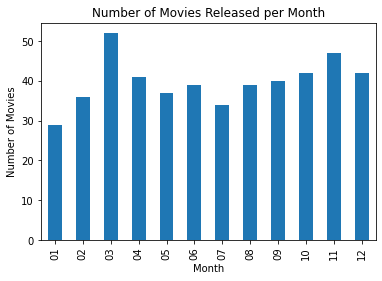

In [8]:
# set up bar chart
month_counts.plot.bar(x = "Release Month", y = month_counts,
                     title = "Number of Movies Released per Month")
plt.xlabel("Month")
plt.ylabel("Number of Movies")
plt.show()

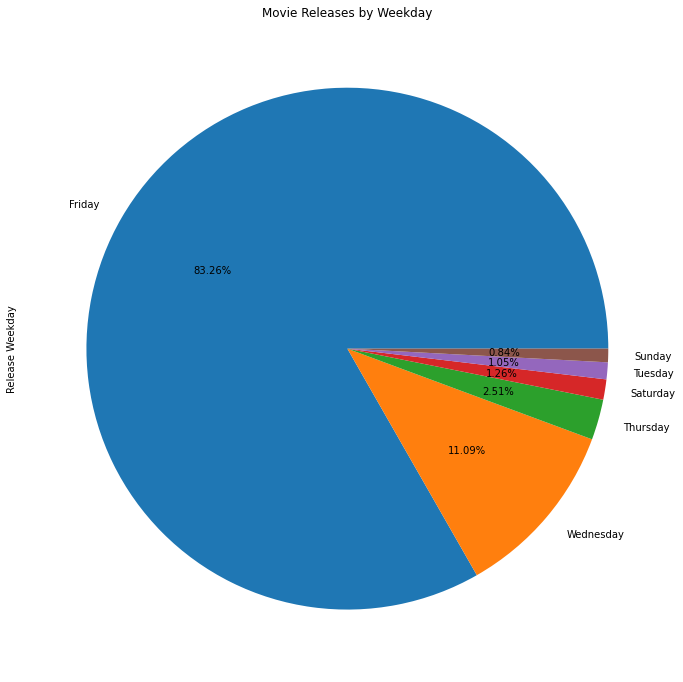

In [9]:
# set up pie chart
day = clean_file["Release Date"].dt.day_name()
clean_file["Release Weekday"] = day
day_counts = clean_file["Release Weekday"].value_counts()
day_counts.plot.pie(x = "Release Weekday", y = day_counts,
                   title = "Movie Releases by Weekday",
                   figsize=[12,12],
                   autopct="%1.2f%%")
plt.show()

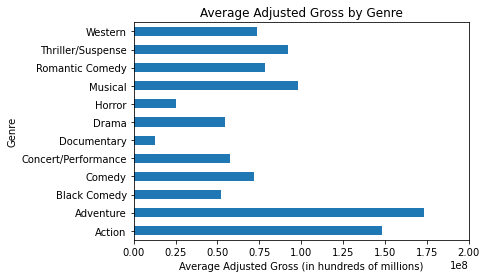

In [10]:
# which genres have the highest movie revenue?
groups=clean_file.groupby("Genre")["Inflation-Adjusted Gross"].mean()
groups.plot.barh(x = groups.index.values, y = groups.values,
                title = "Average Adjusted Gross by Genre")
plt.xlabel("Average Adjusted Gross (in hundreds of millions)")
plt.ylabel("Genre")
plt.xlim(0,200000000)
plt.show()

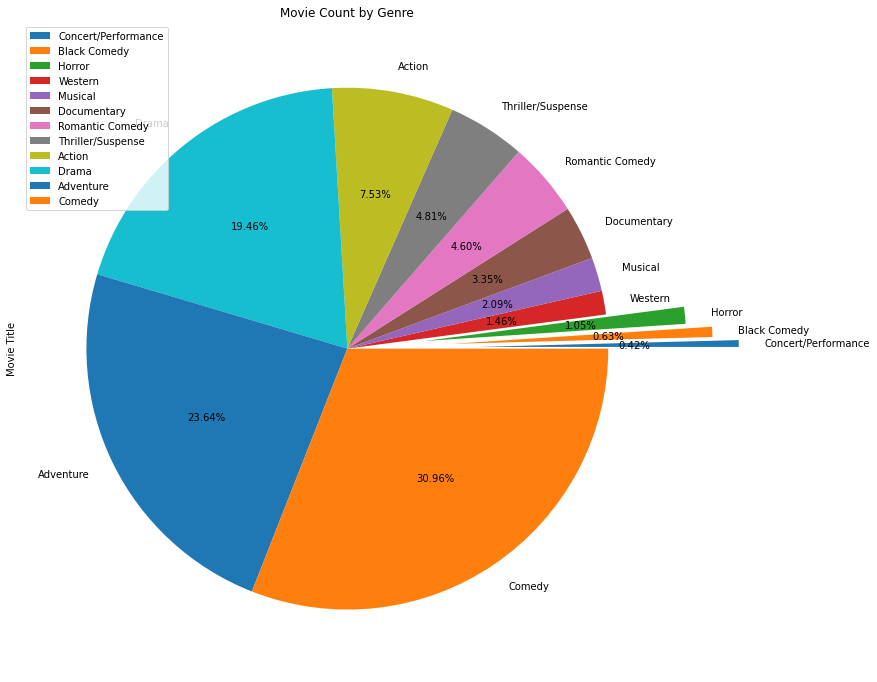

In [11]:
# create pie chart of count per genre
count_genre = clean_file.groupby("Genre")["Movie Title"].count()
count_genre = count_genre.sort_values()
count_genre.plot.pie(x = "Genre", y = count_genre,
                   title = "Movie Count by Genre",
                   figsize=[12,12],
                   autopct="%1.2f%%",
                   legend = True,
                   explode = [.5,.4,.3,0,0,0,0,0,0,0,0,0])
plt.show()

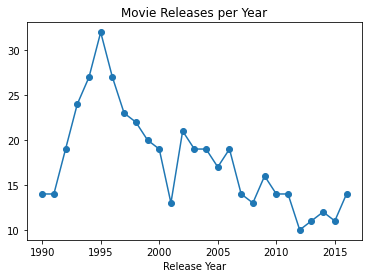

In [12]:
# change in movie releases per year
year_count = clean_file.groupby("Release Year")["Inflation-Adjusted Gross"].count()
year_count.plot.line(x = "Release Year", y = year_count,
                    title = "Movie Releases per Year",
                    marker = 'o')
plt.show()

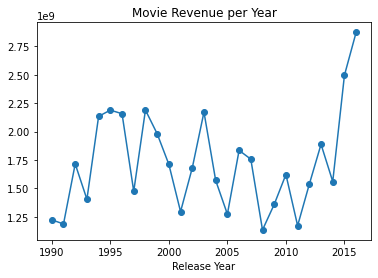

In [13]:
# change in movie revenue per year
year_sum = clean_file.groupby("Release Year")["Inflation-Adjusted Gross"].sum()
year_sum.plot.line(x = "Release Year", y = year_sum,
                    title = "Movie Revenue per Year",
                  marker='o')
plt.show()